In [68]:
#Data processing
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
from collections import Counter
import time
#from nptdms import TdmsFile #Process raw ramping file

In [81]:
def load_sensor(dir_path, sensor, time_range = None):
    
    data = pd.DataFrame(data = {sensor: np.load(dir_path + sensor + ".npy"),
                                "time": np.load(dir_path + "time.npy")})
    
    start = min(data["time"])
    end = max(data["time"])
    
    if time_range:
        start = time_range[0]
        end = time_range[1]
    
    
    data = data[(data["time"] > start) & (data["time"] < end)]
   
    %reset -f in
    
    return data[sensor]

def load_time(dir_path, time_range = None):
    
    tdata = np.load(dir_path + "time.npy")
    
    start = min(tdata)
    end = max(tdata)
    
    if time_range:
        start = time_range[0]
        end = time_range[1]
    
    
    tdata = tdata[(tdata > start) & (tdata < end)]
   
    %reset -f in
    
    return tdata

#########-------Zero crossings---------###########
"""
def zero_crossings(array):
    
    array[(array > 0.1) | (array < -0.1)] = 0
    
    array[(array < 0.001) & (array > -0.001)] = 0
    
    zero_crossings = ((array[:-1] * array[1:]) < 0).sum()/array.size
    
    return zero_crossings
"""

def zero_crossings(array):
    
    #Set values outside of range (0.001, 0.1) = 0
    array[abs(array) > 0.1] = 0
    array[abs(array) < 0.005] = 0
    
    #Calculate number of zero-crossing points, normalized by the window size
    zero_crossings = ((array[:-1] * array[1:]) < 0).sum()/array.size
    
    return zero_crossings


def plot_zero_crossings(dir_path, channel, time_range = None, window = 2000, step = 10):
    
    time_axis = load_time(dir_path, time_range)[window-1::step]
    zero_sensor = load_sensor(dir_path, channel, time_range = time_range).rolling(window=window).apply(zero_crossings, raw = True).to_numpy()[window-1::step]
    
    #Zero crossings plot
    plt.figure(figsize=(20,2))
    plt.plot(time_axis, zero_sensor,
             label = "Number of normalized zero-crossings",
             color = 'orange')
    plt.xlabel("Time (s)")
    plt.title("Variable {}'s normalized Zero crossings".format(channel))
    plt.show()
    
    %reset -f in
def bar_plot_zero(dir_path, sensor, time_range):
    
    data = load_sensor(dir_path, sensor, time_range)
    
    time_label = list(range(time_range[0], time_range[1]))
    
    zero_cross = []
    
    for i in range(int(len(time_label)/2)):
        
        index = i*200000
        
        zero_cross.append(zero_crossings(data[index:index + 200000]))
    
    print(zero_cross)
    
    #Barplot
    plt.bar(np.arange(len(zero_cross)), zero_cross)
        
def plot_zero_crossings_product(dir_path, time_range = None, window = 2000, step = 10):
    time_axis = load_time(dir_path, time_range)[window-1::step]
    ai0 = load_sensor(dir_path, "ai0", time_range = time_range).rolling(window=window).apply(zero_crossings, raw = True).to_numpy()[window-1::step]
    ai1 = load_sensor(dir_path, "ai1", time_range = time_range).rolling(window=window).apply(zero_crossings, raw = True).to_numpy()[window-1::step]
    ai2 = load_sensor(dir_path, "ai2", time_range = time_range).rolling(window=window).apply(zero_crossings, raw = True).to_numpy()[window-1::step]
    ai3 = load_sensor(dir_path, "ai3", time_range = time_range).rolling(window=window).apply(zero_crossings, raw = True).to_numpy()[window-1::step]
    ai4 = load_sensor(dir_path, "ai4", time_range = time_range).rolling(window=window).apply(zero_crossings, raw = True).to_numpy()[window-1::step]
    
    product = ai0*ai1*ai2*ai3*ai4
    
    #Plot
    plt.figure(figsize=(20,2))
    plt.plot(time_axis, product)
    plt.xlabel("Time (s)")
    plt.title("Product of zero crossings across all sensors.")
    
def load_and_plot(dir_path, channel, time_range):
    
    signal = load_sensor(dir_path, channel, time_range)
    time_axis = load_time(dir_path, time_range)
    
    plt.figure(figsize=(20,2))
    plt.plot(time_axis, signal)
    
    plt.xlabel("Time (s)")
    plt.grid(True)
    
    %reset -f in

def plot_dist_amp(dir_path, channel, time_range, bins = 1000):
    amp = load_sensor(dir_path, channel, time_range).abs().to_numpy()
    
    sns.distplot(amp, bins = bins)
    plt.xlim([0.0001,0.02])

Flushing input history
Flushing input history
Flushing input history


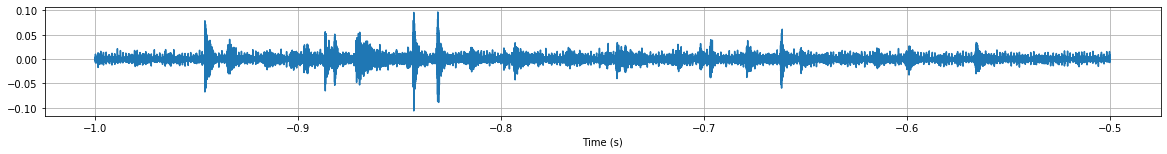

In [65]:
load_and_plot("./data/Ramp22/", "ai2", time_range = (-1, -0.5))

Flushing input history
Flushing input history
Flushing input history


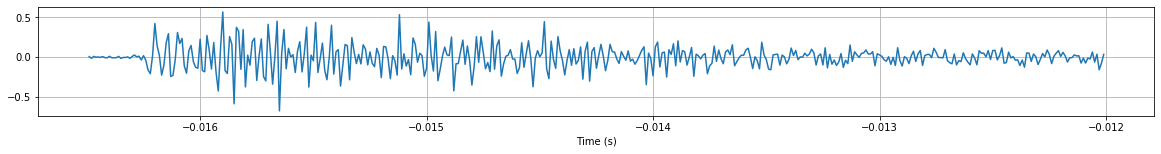

In [64]:
load_and_plot("./data/Ramp22/", "ai2", time_range = (-16.5e-3, -12e-3))

Flushing input history
Flushing input history


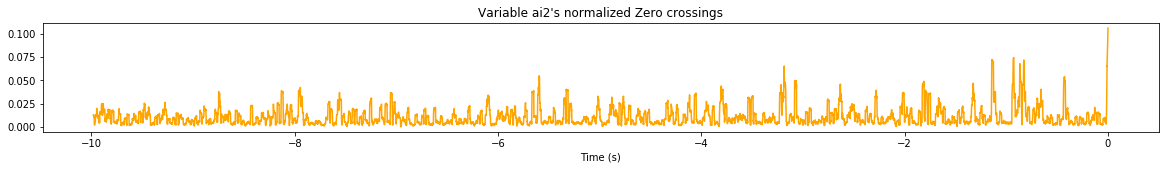

Flushing input history


In [75]:
plot_zero_crossings("./data/Ramp22/", "ai2", time_range = (-10,0))

Flushing input history
Flushing input history


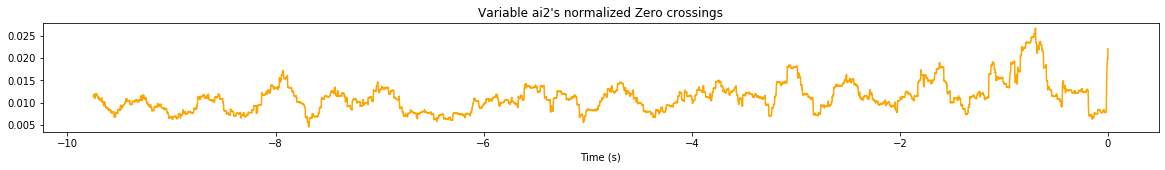

Flushing input history


In [53]:
plot_zero_crossings("./data/Ramp22/", "ai2", time_range = (-10,0), window = 25000)

Flushing input history
Flushing input history


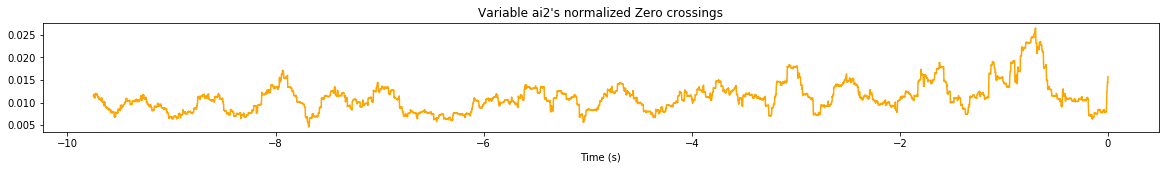

Flushing input history


In [76]:
plot_zero_crossings("./data/Ramp22/", "ai2", time_range = (-10,0), window = 25000)

Flushing input history
Flushing input history


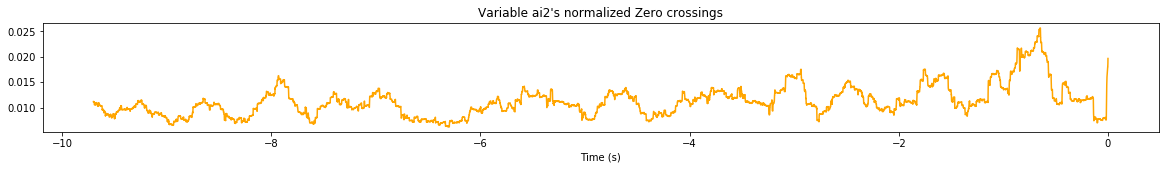

Flushing input history


In [57]:
plot_zero_crossings("./data/Ramp22/", "ai2", time_range = (-10,0), window = 30000)

Flushing input history
Flushing input history


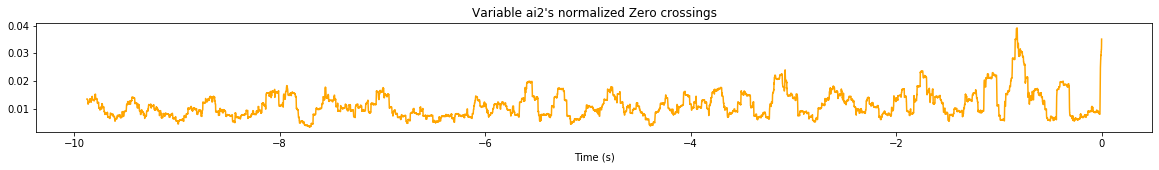

Flushing input history


In [54]:
plot_zero_crossings("./data/Ramp22/", "ai2", time_range = (-10,0), window = 12500)

Flushing input history
Flushing input history


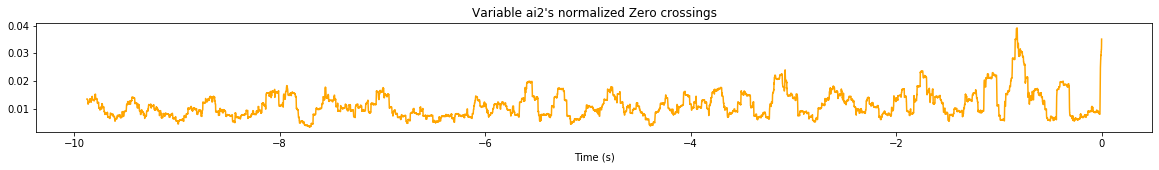

Flushing input history


In [54]:
plot_zero_crossings("./data/Ramp22/", "ai2", time_range = (-10,0), window = 12500)

Flushing input history
Flushing input history


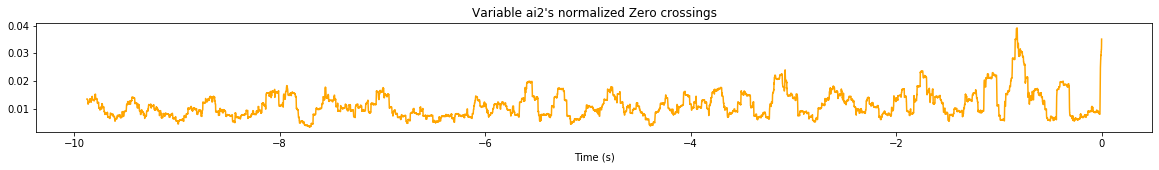

Flushing input history


In [54]:
plot_zero_crossings("./data/Ramp22/", "ai2", time_range = (-10,0), window = 1000)

Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history


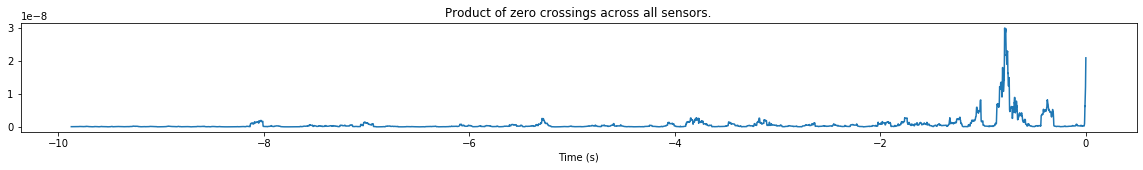

In [77]:
#Threshold 0.01;0.1
plot_zero_crossings_product("./data/Ramp22/", time_range = (-10,0), window = 12500)

Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history


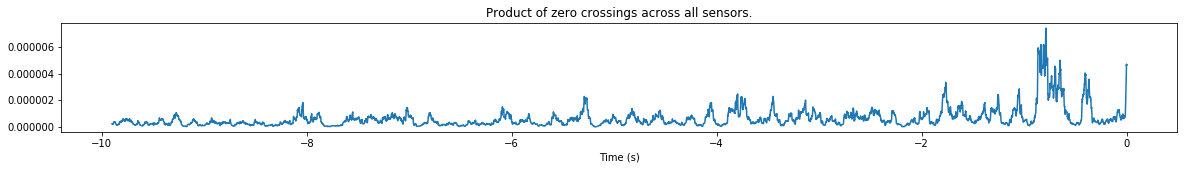

In [84]:
#Threshold 0.01;0.1
plot_zero_crossings_product("./data/Ramp22/", time_range = (-10,0), window = 10000)

Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history


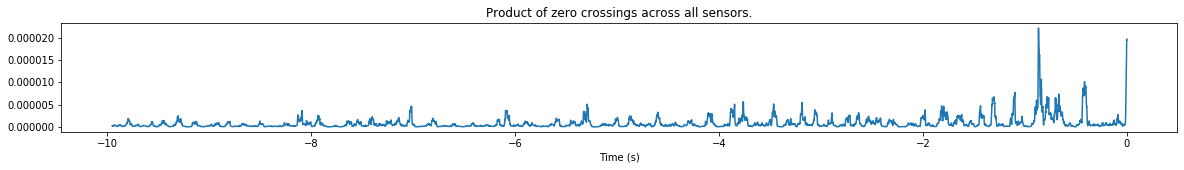

In [85]:
#Threshold 0.01;0.1
plot_zero_crossings_product("./data/Ramp22/", time_range = (-10,0), window = 5000)

Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history


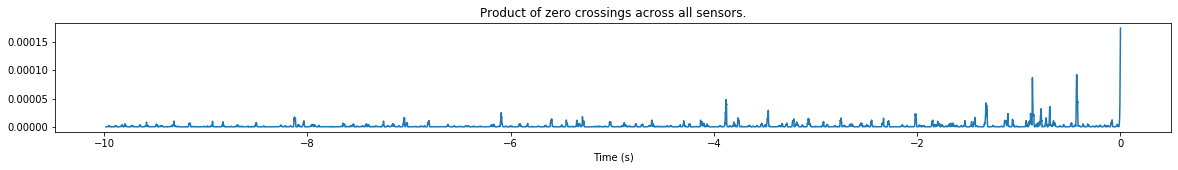

In [88]:
#Threshold 0.01;0.1
plot_zero_crossings_product("./data/Ramp22/", time_range = (-10,0), window = 2000)

Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history


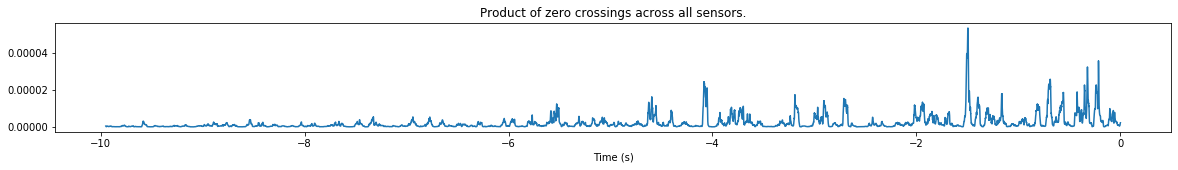

In [87]:
#Threshold 0.01;0.1
plot_zero_crossings_product("./data/Ramp23/", time_range = (-10,0), window = 5000)

Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history


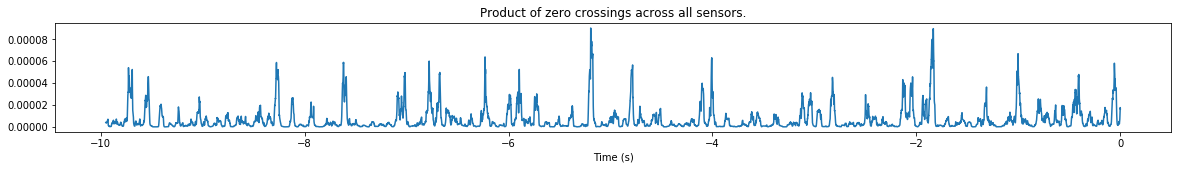

In [86]:
#Threshold 0.01;0.1
plot_zero_crossings_product("./data/Ramp20/", time_range = (-10,0), window = 5000)

Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history


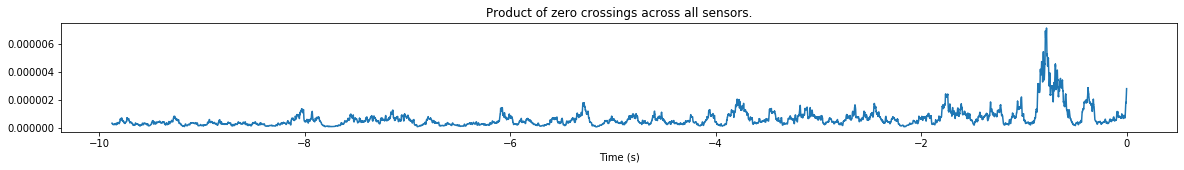

In [82]:
#Threshold 0.005;0.1
plot_zero_crossings_product("./data/Ramp22/", time_range = (-10,0), window = 12500)

Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history


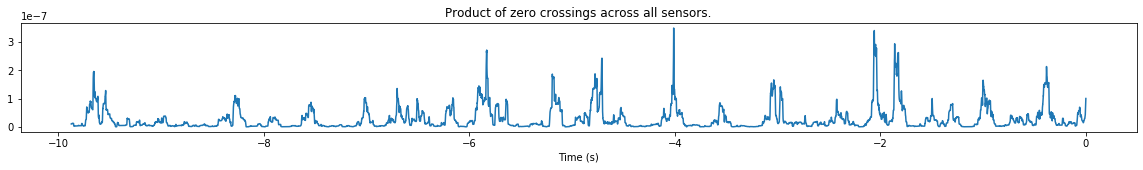

In [78]:
#Threshold 0.01;0.1
plot_zero_crossings_product("./data/Ramp20/", time_range = (-10,0), window = 12500)

Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history


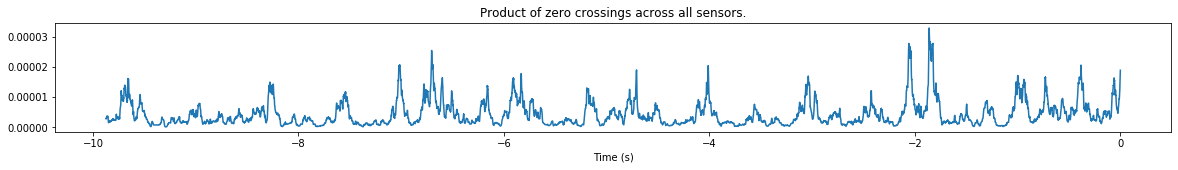

In [83]:
#Threshold 0.005;0.1
plot_zero_crossings_product("./data/Ramp20/", time_range = (-10,0), window = 12500)

Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history


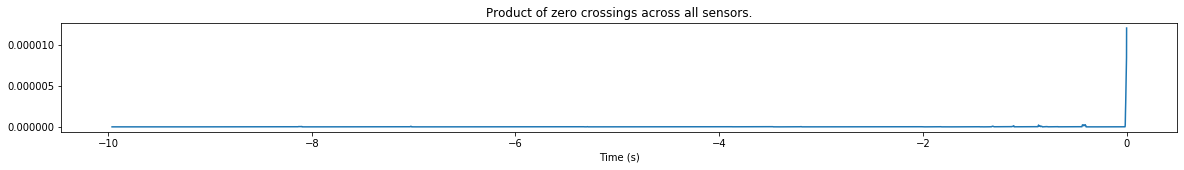

In [60]:
#Threshold 0.01
plot_zero_crossings_product("./data/Ramp22/", time_range = (-10,0), window = 4000)

Flushing input history
Flushing input history


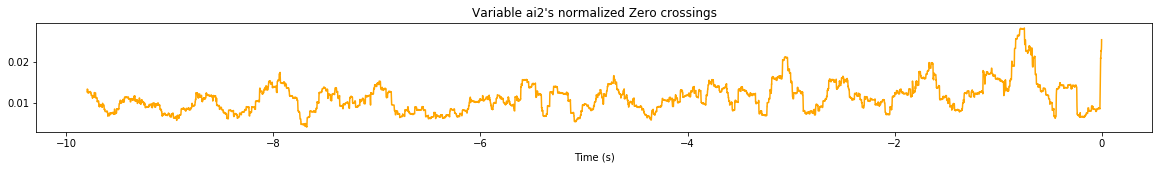

Flushing input history


In [56]:
plot_zero_crossings("./data/Ramp22/", "ai2", time_range = (-10,0), window = 20000)

In [16]:
bar_plot_zero("./data/Ramp22/", "ai2", time_range = (-10,0))

Flushing input history
[48690, 48059, 47675, 47017, 48539, 46481, 48580, 47665, 46924]


In [18]:
bar_plot_zero("./data/Ramp22/", "ai2", time_range = (-10,0))

Flushing input history
[96750, 94693, 95021, 96246, 92946]


In [19]:
bar_plot_zero("./data/Ramp22/", "ai2", time_range = (-20,0))

Flushing input history
[98350, 97601, 96677, 97619, 94762, 96750, 94693, 95021, 96246, 92946]


Flushing input history
[1808, 1532, 1827, 1688, 1836, 1961, 1917, 2156, 2427, 3074]


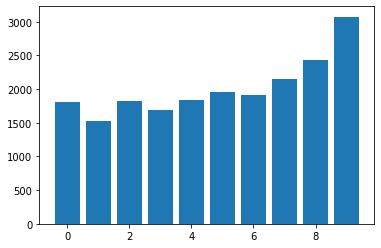

In [44]:
bar_plot_zero("./data/Ramp22/", "ai2", time_range = (-20,0))

Flushing input history
[63, 34, 55, 17, 51, 68, 9, 33, 77, 57]


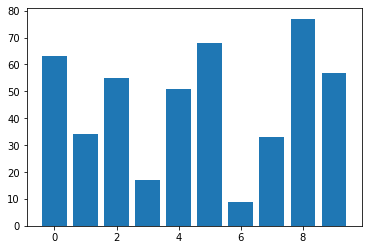

In [47]:
#0.1, -0.1
bar_plot_zero("./data/Ramp20/", "ai2", time_range = (-20,0))

Flushing input history
[98350, 97601, 96677, 97619, 94762, 96750, 94693, 95021, 96246, 92946]


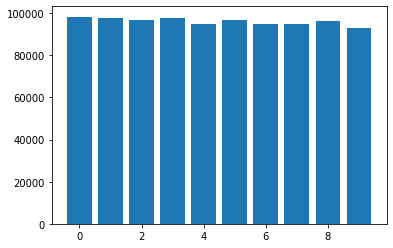

In [25]:
bar_plot_zero("./data/Ramp22/", "ai2", time_range = (-20,0), block_size = 150)